In [31]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.dates as mdates
plt.style.use('ggplot')
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (12, 8),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from utils import remove_spikes_mad, compute_vwap

In [80]:
as_of = datetime.date(2025, 9, 17)
ct = 5

In [81]:
url = f"https://raw.githubusercontent.com/yieldcurvemonkey/otr_trace/refs/heads/main/TRACE_{ct}Y/{as_of.strftime(f"%Y-%m-%d")}.parquet"
raw_df = pd.read_parquet(url, engine="pyarrow")
raw_df

,tradeTime,cusip,issueSymbolIdentifier,priceType,reportingSideCode,contraPartyTypeCode,tradeDate,reportedTradeVolume,lastSaleYield,lastSalePrice
0,08:00:01,91282CNX5,TSRYS6152552,D,B,A,2025-09-17,82000.00,3.582141,100.191406
1,08:00:01,91282CNX5,TSRYS6152552,D,B,A,2025-09-17,73000.00,3.585610,100.175781
2,08:00:05,91282CNX5,TSRYS6152552,D,S,T,2025-09-17,1000000.00,3.584742,100.179688
3,08:00:05,91282CNX5,TSRYS6152552,D,S,T,2025-09-17,2000000.00,3.584742,100.179688
4,08:00:05,91282CNX5,TSRYS6152552,D,S,T,2025-09-17,1000000.00,3.584742,100.179688
...,...,...,...,...,...,...,...,...,...,...
112801,17:29:16,91282CNX5,TSRYS6152552,D,B,A,2025-09-17,61000000.00,3.584323,100.181577
112802,17:31:11,91282CNX5,TSRYS6152552,D,S,A,2025-09-17,7000000.00,3.629869,99.976664
112803,17:31:12,91282CNX5,TSRYS6152552,D,B,A,2025-09-17,65100000.00,3.591390,100.149750
112804,17:34:01,91282CNX5,TSRYS6152552,D,S,A,2025-09-17,205000000.00,3.631980,99.967179


In [ ]:
interval = "1min"

min_vwap_df = compute_vwap(
    df=remove_spikes_mad(raw_df, price_col="lastSaleYield", bucket="1min", mad_k=1.0, min_trades=25),
    interval=interval,
    group_keys=("cusip",),
    price_col="lastSaleYield",
    volume_col="reportedTradeVolume",
    date_col="tradeDate",
    time_col="tradeTime",
)
min_vwap_df

c:\Users\chris\clee\otr_trace\utils.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned = s.groupby(list(group_keys) + ["_bucket"], group_keys=False, sort=False).apply(_trim_bucket).reset_index(drop=True)


volume  trades      open      high  \
cusip     1min_start                                                            
91282CNX5 2025-09-17 08:00:00-04:00  5.338159e+09    2111  3.582141  3.586513   
          2025-09-17 08:01:00-04:00  5.935395e+09    2901  3.579140  3.586513   
          2025-09-17 08:02:00-04:00  5.411478e+09    2633  3.585976  3.587778   
          2025-09-17 08:03:00-04:00  4.771639e+09    2211  3.582141  3.584309   
          2025-09-17 08:04:00-04:00  1.767012e+09     833  3.577806  3.581897   
...                                           ...     ...       ...       ...   
          2025-09-17 16:55:00-04:00  6.700000e+07      41  3.654285  3.654285   
          2025-09-17 16:56:00-04:00  8.172000e+07      25  3.655117  3.655117   
          2025-09-17 16:57:00-04:00  8.284200e+07      40  3.655117  3.655117   
          2025-09-17 16:58:00-04:00  7.900000e+07      17  3.654682  3.654682   
          2025-09-17 16:59:00-04:00  1.742000e+08      57  3.654217  3.654291   

                                          low     close      vwap  
cusip     1min_start                                               
91282CNX5 2025-09-17 08:00:00-04:00  3.577806  3.584309  3.582203  
          2025-09-17 08:01:00-04:00  3.577806  3.585455  3.582452  
          2025-09-17 08:02:00-04:00  3.577952  3.581274  3.583245  
          2025-09-17 08:03:00-04:00  3.575205  3.577806  3.578805  
          2025-09-17 08:04:00-04:00  3.577372  3.580446  3.579152  
...                                       ...       ...       ...  
          2025-09-17 16:55:00-04:00  3.654196  3.654246  3.654254  
          2025-09-17 16:56:00-04:00  3.654207  3.655117  3.654908  
          2025-09-17 16:57:00-04:00  3.654213  3.654682  3.654626  
          2025-09-17 16:58:00-04:00  3.654224  3.654246  3.654456  
          2025-09-17 16:59:00-04:00  3.654196  3.654246  3.654256  

[540 rows x 7 columns]

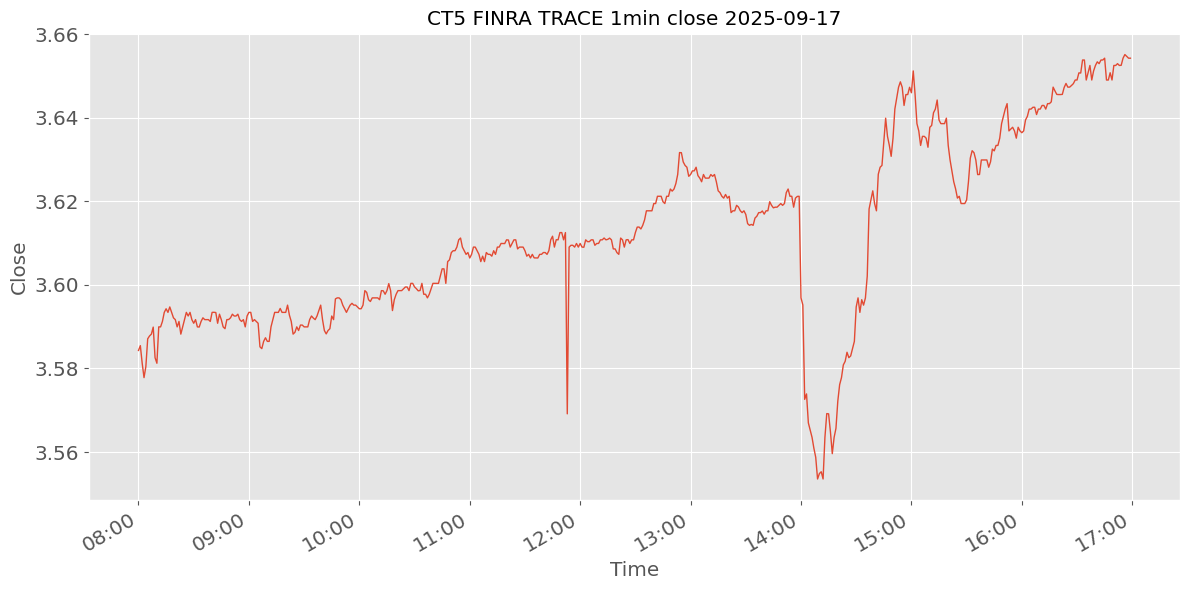

In [83]:
col = "close"
s = min_vwap_df.reset_index(level=[0])[col].copy()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(s.index, s.values, lw=1)

tz = s.index.tz
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=tz))
ax.set_title(f"CT{ct} FINRA TRACE {interval} {col} {as_of}")
ax.set_xlabel("Time")
ax.set_ylabel("Close")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()